# First order equations have no exponent.

* 2D - Straight lines
    * y = mx + c
    * ax + by = c
* 3D - Flat surfaces
    * z = ax + by + k
    * ax + by + cz = k


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2D Systems of equations

Solve a system of equations using the np.linalg.solve function

* 1x + 2y = 1
* 3x + 5y = 2

in the form of a linear matrix equation ax = b, given a and b, solve for x.

In [ ]:
# Using NumPy linalg.solve
# Computes the "exact" solution, x, of the well-determined, full rank, linear matrix equation ax = b.
# Solve the system of equations x0 + 2 * x1 = 1 and 3 * x0 + 5 * x1 = 2:
a = np.array([
    [1, 2], 
    [3, 5]
])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
print(x)

# Check that the solution is correct using the "allclose" function
# which checks if two arrays are element-wise equal within a tolerance.
# Compare the dot product of a and x with b:
print(np.allclose(np.dot(a, x), b))

In [ ]:
# Plot the lines and the solution
def eq0(x):
    return -1/2*x + 1/2

def eq1(x):
    return -3/5*x + 2/5

x_range = np.arange(-1.5, -0.25, 0.25)

plt.plot(x_range, eq0(x_range), label='eq0')
plt.plot(x_range, eq1(x_range), label='eq1')
plt.plot(*x, 'o', markersize=5, color='k', label='Solution')
plt.legend()
plt.show()


Solve a system of equations using the **np.linalg.lstsq** (least squares) function
which is used when there may not be an exact solution.

It returns residuals and the rank of the result x.

* 3x + 2y = 9
* 2x + 4y = 8

In [ ]:
# Using NumPy linalg.lstsq
# Solve the system of linear equations:
# 3x + 2y = 9
# 2x + 4y = 8
a = np.array([[3, 2], [2, 4]])
b = np.array([9, 8])
x, res, rnk, s = np.linalg.lstsq(a, b, rcond=None)
print(x)
print(res)
print(rnk)

In [ ]:
# Plot the lines and the solution
def eq0(x):
    return -3/2*x + 9/2

def eq1(x):
    return -2/4*x + 8/4

x_range = np.arange(2, 3, 0.25)

plt.plot(x_range, eq0(x_range), label='eq0')
plt.plot(x_range, eq1(x_range), label='eq1')
plt.plot(*x, 'o', markersize=5, color='k', label='Solution')
plt.legend()
plt.show()

### Try to fit a line through some noisy data using least squares

In [ ]:
# Fit a line, y = mx + c, through some noisy data-points:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
# By examining the coefficients, we see that the line should have a gradient of roughly 1
# and cut the y-axis at, more or less, -1.
# We can rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]].
# Now use lstsq to solve for p:

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
# (1.0 -0.95) # may vary

# Plot the 2D data along with the fitted line:
plt.plot(x, y, 'o', label='Original data', markersize=5)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

### 3D Systems of Equations

Solve the following system of linear equations
using the linalg.solve function.

* eq0: 1x + 3y - 2z =  2, multiply eq0 by 2 =>  2x + 6y - 4z = 4, add (eq0 + eq1) => 4x + 7y = 3, => **y = -4/7x + 3/7**
* eq1: 2x + 1y + 4z = -1, multiply eq2 by 4 => 12x - 8y + 4z = 4, sub (eq2 - eq1) => 10x - 9y = 5, => **y = 10/9x - 5/9**
* eq2: 3x - 2y +  z =  1, multiply eq2 by 2 =>  6x - 4y + 2z = 2, add (eq2 + eq0) => 7x - 1y = 4, => **y = 7x - 4**

Solve for x in the form of the linear matrix equation ax = b.
Where a is a 3x3 matrix and x and b are 3x1 vectors.

          |1,  3, -2|      |x|      | 2|
    a =   |2,  1,  4|, x = |y|, b = |-1|
          |3, -2,  1|      |z|      | 1|


In [4]:
# Solve the following system of linear equations
# using the linalg.solve function.
# 1x + 3y -2z = 2
# 2x + 1y + 4z = -1
# 3x - 2y + z = 1
#
# Solve for x in the form of the linear matrix equation ax = b.
# Where a is a 3x3 matrix and x and b are 3x1 vectors.
#     |1,  3, -2|      |x|      | 2|
# a = |2,  1,  4|, x = |y|, b = |-1|
#     |3, -2,  1|      |z|      | 1|
#
a: np.array = np.array([
    [1,  3, -2],
    [2,  1,  4],
    [3, -2,  1]
])

b: np.array = np.array([
    2,
    -1,
    1
])

print(a.shape, b.shape)

# Solve the system of linear equations
x = np.linalg.solve(a, b)
print(x)

exact_sol = np.array([31/53, 5/53, -30/53])
print(exact_sol)
print(np.allclose(x, exact_sol))

(3, 3) (3,)
[ 0.58490566  0.09433962 -0.56603774]
[ 0.58490566  0.09433962 -0.56603774]
True


In [ ]:
# Define the three equations for plotting the surfaces
# eq0: z =  1/2x + 3/2y - 1
# eq1: z = -1/2x - 1/4y - 1/4
# eq2: z =   -3x +   2y + 1
def eq0(x, y):
    return 1/2*x + 3/2*y - 1


def eq1(x, y):
    return -1/2*x - 1/4*y - 1/4


def eq2(x, y):
    return -3*x + 2*y + 1

In [ ]:
# Define the 3 equations for the line intersections between each pair of surfaces
# eq0_1: y = -4/7x + 3/7
# eq1_2: y = 10/9x - 5/9
# eq2_0: y =  7x - 4
def eq0_1(x):
    return -4/7*x + 3/7

def eq1_2(x):
    return 10/9*x - 5/9

def eq2_0(x):
    return 7*x - 4

In [ ]:
# Plot the three 3D surface equations along with a marker for the solution:
# Define the ranges for x and y
x_range = np.arange(-1, 2, 0.25)
y_range = np.arange(-1, 2, 0.25)
X, Y = np.meshgrid(x_range, y_range)

# Prepare 3D figure and label axes
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the surface equations
ax.plot_surface(X, Y, eq0(X, Y), color='r', alpha=0.2, label='eq0')
ax.plot_surface(X, Y, eq1(X, Y), color='g', alpha=0.2, label='eq1')
ax.plot_surface(X, Y, eq2(X, Y), color='b', alpha=0.2, label='eq2')

# Plot the line intersections
ax.plot(x_range, eq0_1(x_range), eq0(x_range, eq0_1(x_range)), color='r')
ax.plot(x_range, eq1_2(x_range), eq1(x_range, eq1_2(x_range)), color='g')
ax.plot(x_range, eq2_0(x_range), eq2(x_range, eq2_0(x_range)), color='b')

ax.set_ylim(-1, 2)
ax.set_xlim(-1, 2)
ax.set_zlim(-2, 3)

# Plot the solution
# ax.plot(x[0], x[1], x[2], 'o', markersize=2, color='k')
ax.plot(*x, 'o', markersize=5, color='k', label='Solution')
ax.legend()

fig.show()
#plt.show()

In [ ]:
# Test some stuff
print(a)
print(f"Inverse of a: {np.matrix(a).I}")
print(f"Transpose of a: {np.matrix(a).T}")
print(f"Determinant of a: {np.linalg.det(a)}")


In [ ]:
# Slice the matrix a to get the coefficients
x_coefficients = a[:,0]
y_coefficients = a[:,1]
z_coefficients = a[:,2]

print(a.shape[0])
print(x_coefficients)
print(y_coefficients)
print(z_coefficients)
print(a.T)

In [5]:
# Solve the following system of linear equations
# using the linalg.solve function.
# 1x + 3y - 2z = 2
# 2x + 1y + 4z = -1
# 3x - 2y + 1z = 1

# Define the three equations for plotting the surfaces
# need to solve for z:
# divide all elements in a and b by z_coefficients and then negate
# eq0: z =  1/2x + 3/2y - 1
# eq1: z = -1/2x - 1/4y - 1/4
# eq2: z =   -3x +   2y + 1
a_surface = a / (a[:,2][:, np.newaxis])*-1
print(a_surface[:,:2])

b_surface = b / a[:,2]
print(b_surface)

surf_mat = np.insert(a_surface[:,:2], 2, b_surface, axis=1)
print(surf_mat)

# Define the 3 equations for plotting the line intersections between each pair of surfaces
# eq0: 1x + 3y - 2z =  2, multiply eq0 by 2 =>  2x + 6y - 4z = 4, add (eq0 + eq1) =>  4x + 7y = 3, => **y = -4/7x + 3/7**
# eq1: 2x + 1y + 4z = -1, multiply eq2 by 4 => 12x - 8y + 4z = 4, sub (eq2 - eq1) => 10x - 9y = 5, => **y = 10/9x - 5/9**
# eq2: 3x - 2y +  z =  1, multiply eq2 by 2 =>  6x - 4y + 2z = 2, add (eq2 + eq0) =>  7x - 1y = 4, => **y = 7x - 4**

# eq0_1: y = -4/7x + 3/7
# eq1_2: y = 10/9x - 5/9
# eq2_0: y =    7x - 4


[[ 0.5   1.5 ]
 [-0.5  -0.25]
 [-3.    2.  ]]
[-1.   -0.25  1.  ]
[[ 0.5   1.5  -1.  ]
 [-0.5  -0.25 -0.25]
 [-3.    2.    1.  ]]


In [ ]:
# Create a 3x3 matrix (example)
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Create a 1D vector (example)
v = np.array([2, 3, 4])

# Multiply each row of the matrix by the corresponding value from the vector
result = M * v[:, np.newaxis]

print("Resulting matrix:")
print(result)

In [ ]:
# Create a 3x3 matrix (example)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Create a 1D vector (example)
vector = np.array([10, 20, 30])

# Reshape the vector to a column vector
reshaped_vector = vector[:, np.newaxis]

# Add the column vector to the matrix
result = matrix + reshaped_vector

print("Resulting matrix:")
print(result)

In [ ]:
# Example matrix (3x2)
matA = np.array([[1, 2, 3],
                 [2, 3, 4]])

# Example vector (1x2)
new_col = np.array([0, 0])

# Insert the new column at a specific index (e.g., index 3)
idx = 3
result_matrix = np.insert(matA, idx, new_col, axis=1)

print("Resulting matrix:")
print(result_matrix)

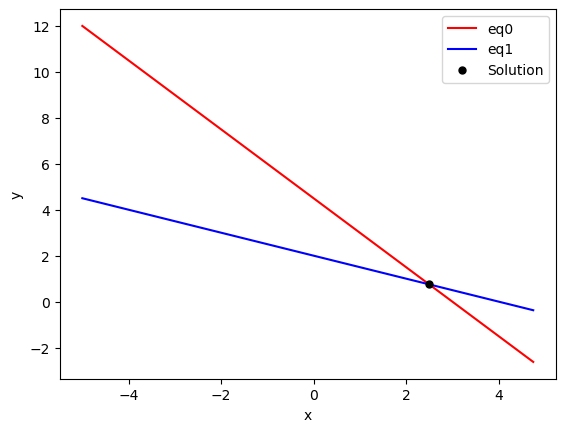

In [2]:
# Test 2d system of linear equations
from SystemOfEquations import FoSysEq

a_2d = np.array([[3, 2], [2, 4]])
b_2d = np.array([9, 8])
sys_eq_2d = FoSysEq(a_2d, b_2d)
fig, ax = sys_eq_2d.plot_solution()
ax.legend()
plt.show()


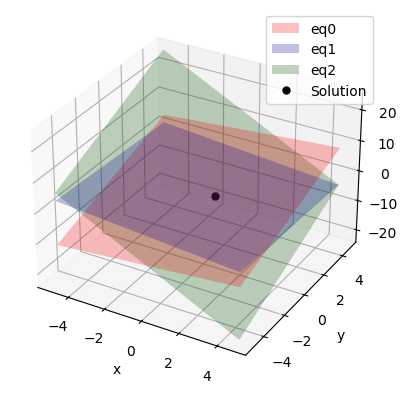

In [2]:
# Test 3d system of linear equations
from SystemOfEquations import FoSysEq

a_3d = np.array([[1, 3, -2], [2, 1, 4], [3, -2, 1]])
b_3d = np.array([2, -1, 1])
sys_eq_3d = FoSysEq(a_3d, b_3d)
fig, ax = sys_eq_3d.plot_solution()
ax.legend()
plt.show()